In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('dataset/used_car_sales.csv')

# EDA

In [5]:
df.head()

Unnamed: 0                              Name  Year  Kilometers_Driven  \
0           0            Maruti Wagon R LXI CNG  2010              72000   
1           1  Hyundai Creta 1.6 CRDi SX Option  2015              41000   
2           3                 Maruti Ertiga VDI  2012              87000   
3           6            Nissan Micra Diesel XV  2013              86999   
4          12             Maruti Swift VDI BSIV  2015              64424   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
3    Diesel       Manual      First  23.08 kmpl  1461 CC   63.1 bhp    5.0   
4    Diesel       Manual      First   25.2 kmpl  1248 CC     74 bhp    5.0   

         Price  
0   35936250.0  
1  256687500.0  
2  123210000.0  
3   71872500.0  
4  114996000.0

In [6]:
df.shape

(2059, 12)

In [7]:
df = df.drop(columns=['Unnamed: 0'])

Next, below we check the data types in each feature.

In [8]:
df.dtypes

Name                  object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2059 non-null   object 
 1   Year               2059 non-null   int64  
 2   Kilometers_Driven  2059 non-null   int64  
 3   Fuel_Type          2059 non-null   object 
 4   Transmission       2059 non-null   object 
 5   Owner_Type         2059 non-null   object 
 6   Mileage            2059 non-null   object 
 7   Engine             2059 non-null   object 
 8   Power              2059 non-null   object 
 9   Seats              2059 non-null   float64
 10  Price              2059 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 177.1+ KB


In [10]:
df.describe()

Year  Kilometers_Driven        Seats         Price
count  2059.000000        2059.000000  2059.000000  2.059000e+03
mean   2013.455075       59285.758621     5.300631  1.511112e+08
std       2.520335       37942.867971     0.743913  1.405421e+08
min    2001.000000        1048.000000     5.000000  1.232100e+07
25%    2012.000000       37272.500000     5.000000  6.981900e+07
50%    2014.000000       55598.000000     5.000000  1.049338e+08
75%    2015.000000       72001.500000     5.000000  1.652041e+08
max    2019.000000      720000.000000     8.000000  1.078088e+09

# Data Cleaning 

Data cleansing or also known as data scrubbing is a process of analyzing the quality of the data by changing it. The cleaned data is data that is wrong, damaged, inaccurate, incomplete and formatted.

In [11]:
df.isnull().any()

Name                 False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage              False
Engine               False
Power                False
Seats                False
Price                False
dtype: bool

From what we can see, it doesn't show any Nanvalue/null, but this can't be a definitive benchmark that the dataset doesn't have an empty dataset. It's possible that the null value is replaced with the value '0' for numeric or the null value has been replaced with a string that says ' null'

Therefore we will create a function to check whether the value in the numeric column has the same value as '0' or the value in the object/string column contains the words 'null'.

In [12]:
def check_null_or_zero(df):
    for i in df.columns.values:
        if (df[i].dtypes == 'object'):
            if df[i].str.contains('null').any():
                print('column {} contain null'.format(i))
        else:
            if (df[i][0] == 0) :
                print('Column {} has value 0'.format(i))            

In [13]:
delrow_id = df[df['Power'].str.contains('null') == True].index


In [14]:
check_null_or_zero(df)

column Power contain null


From what we check from the function we created, there is a null value in the 'Power' column

In [15]:
df.drop(delrow_id,inplace=True)

In [16]:
def replace_certain_str(arr):
    for i in arr:
        if (i== 'Mileage'):
            df['Mileage'] = df['Mileage'].str.replace('km/kg', '')
            df['Mileage'] = df['Mileage'].str.replace('kmpl','')
            df['Mileage'] = df['Mileage'].astype('float')
        elif (i == 'Engine'):
            df['Engine'] = df['Engine'].str.replace('CC','')
            df['Engine'] = df['Engine'].astype('float')
        else:
            df['Power'] = df['Power'].str.replace('bhp','')
            df['Power'] = df['Power'].astype('float')

In [17]:
arr = ['Mileage','Power','Engine']

In [18]:
replace_certain_str(arr)

In [19]:
df.head()

Name  Year  Kilometers_Driven Fuel_Type  \
0            Maruti Wagon R LXI CNG  2010              72000       CNG   
1  Hyundai Creta 1.6 CRDi SX Option  2015              41000    Diesel   
2                 Maruti Ertiga VDI  2012              87000    Diesel   
3            Nissan Micra Diesel XV  2013              86999    Diesel   
4             Maruti Swift VDI BSIV  2015              64424    Diesel   

  Transmission Owner_Type  Mileage  Engine   Power  Seats        Price  
0       Manual      First    26.60   998.0   58.16    5.0   35936250.0  
1       Manual      First    19.67  1582.0  126.20    5.0  256687500.0  
2       Manual      First    20.77  1248.0   88.76    7.0  123210000.0  
3       Manual      First    23.08  1461.0   63.10    5.0   71872500.0  
4       Manual      First    25.20  1248.0   74.00    5.0  114996000.0

# Check data-correlation

we check the correlation between various features with price, the stronger the correlation between features and price, the better the dataset.

<AxesSubplot:>

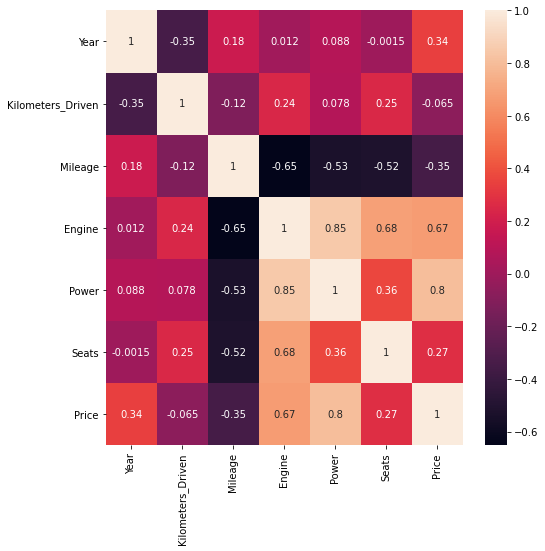

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [21]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

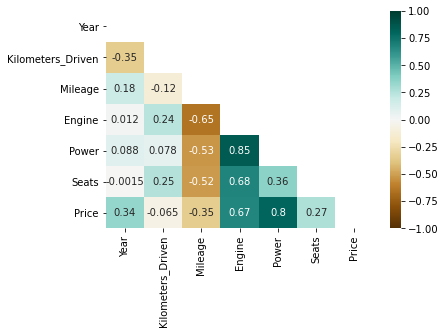

In [22]:
heatmap = sns.heatmap(df.corr(),mask=mask ,vmin=-1, vmax=1, annot=True, cmap='BrBG')

Text(0.5, 1.0, 'Features Correlating with sales')

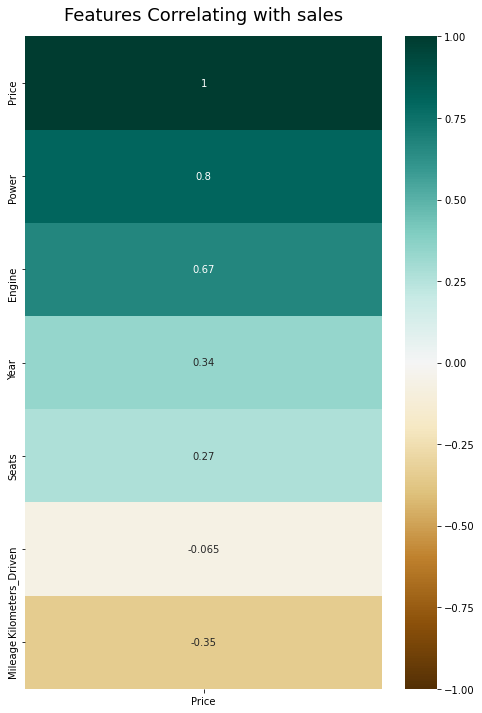

In [23]:
plt.figure(figsize=(8, 12))
hm = sns.heatmap(df.corr()[['Price']].sort_values(by='Price',ascending = False),vmin=-1,vmax=1,annot=True,cmap='BrBG')
hm.set_title('Features Correlating with sales',fontdict={'fontsize':18},pad=16)

# Data Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

from what we check based on the unique value in the 'owner_type' column, the data goes into the ordinal data category,
Ordinal data has numerical values that are related mathematically.

Ex: Hotels consist of 5 classes, 1-5 stars and 5 star hotels certainly have a level of luxury that is closer to a 4-star hotel than a 1-star hotel.

Common categorical data has category values consisting of 2 or more but between these categories there is no occurrence of values that are related value by order.

Ex: the vehicle category consists of motorcycles, cars, trains and planes. But there is no closeness to each other like the example in ordinal data.

In [26]:
df['Owner_Type'] = LabelEncoder().fit_transform(df['Owner_Type'])

In [27]:
df.head()

Name  Year  Kilometers_Driven Fuel_Type  \
0            Maruti Wagon R LXI CNG  2010              72000       CNG   
1  Hyundai Creta 1.6 CRDi SX Option  2015              41000    Diesel   
2                 Maruti Ertiga VDI  2012              87000    Diesel   
3            Nissan Micra Diesel XV  2013              86999    Diesel   
4             Maruti Swift VDI BSIV  2015              64424    Diesel   

  Transmission  Owner_Type  Mileage  Engine   Power  Seats        Price  
0       Manual           0    26.60   998.0   58.16    5.0   35936250.0  
1       Manual           0    19.67  1582.0  126.20    5.0  256687500.0  
2       Manual           0    20.77  1248.0   88.76    7.0  123210000.0  
3       Manual           0    23.08  1461.0   63.10    5.0   71872500.0  
4       Manual           0    25.20  1248.0   74.00    5.0  114996000.0

In the command below we will be encoding values for 'Name', 'Fuel_Type' and 'Transmission' with one-hot encoding technique.
One-hot encoding is different from the label encoding technique above, One-hot encoding is a technique that extract 1 column categorical value into several columns according to the number of unique-categorical values that exist, then each column will only have a value between 0 and 1.
 

In [28]:
encoded_df = pd.get_dummies(df)

In [29]:
encoded_df.head()

Year  Kilometers_Driven  Owner_Type  Mileage  Engine   Power  Seats  \
0  2010              72000           0    26.60   998.0   58.16    5.0   
1  2015              41000           0    19.67  1582.0  126.20    5.0   
2  2012              87000           0    20.77  1248.0   88.76    7.0   
3  2013              86999           0    23.08  1461.0   63.10    5.0   
4  2015              64424           0    25.20  1248.0   74.00    5.0   

         Price  Name_Audi A4 2.0 TDI  \
0   35936250.0                     0   
1  256687500.0                     0   
2  123210000.0                     0   
3   71872500.0                     0   
4  114996000.0                     0   

   Name_Audi A4 2.0 TDI 177 Bhp Premium Plus  ...  \
0                                          0  ...   
1                                          0  ...   
2                                          0  ...   
3                                          0  ...   
4                                          0  ...   

   Name_Volkswagen Polo Petrol Comfortline 1.2L  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Name_Volkswagen Polo Petrol Highline 1.2L  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   Name_Volkswagen Vento 1.5 TDI Highline  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Name_Volkswagen Vento Diesel Highline  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Name_Volkswagen Vento Petrol Highline  Fuel_Type_CNG  Fuel_Type_Diesel  \
0                                      0              1                 0   
1                                      0              0                 1   
2                                      0              0                 1   
3                                      0              0                 1   
4                                      0              0                 1   

   Fuel_Type_Petrol  Transmission_Automatic  Transmission_Manual  
0                 0                       0                    1  
1                 0                       0                    1  
2                 0                       0                    1  
3                 0                       0                    1  
4                 0                       0                    1  

[5 rows x 152 columns]

# Feature-Scaling dataset

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(encoded_df.astype(float)))
scaled_df.columns = encoded_df.columns

# Splitting dataset x and y

In [30]:
scaled_x = scaled_df.drop(columns=['Price'])
scaled_y = scaled_df['Price']

# PCA-Dimmensionality reduction

PCA is a dimension reduction technique.
Dimensionality reduction is the process of reducing the dimensions of large-dimensional data into dimensional data
small. 
There are two techniques in dimensionality reduction, feature selection and feature extraction. 

# CAUTION:

The dataset that contain one hot-encoding shouldn't or rather  useless to used it with PCA.
The reason i doing this , is just to make training dataset more simpler since training too much feature will be computationally expensive or we could actually just remove all the categorical dataset.


i will show you why PCA is useless with one-hot-encoding in other ipynb file in PCA_with_one_hot_encoding.ipynb

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components = 152-1).fit(scaled_x)

In [33]:
pc_train = pca.transform(scaled_x)

In [34]:
pc_train

array([[-2.45895031e-01, -3.54631892e-01, -4.14409102e-01, ...,
        -2.77555756e-17,  2.08166817e-17,  5.55978874e-16],
       [ 5.32566278e-01, -3.97720700e-01, -9.47718623e-02, ...,
         2.20309881e-16, -2.28983499e-16, -9.71445147e-17],
       [ 5.63149776e-01, -5.03299916e-01,  1.94714437e-01, ...,
        -9.71445147e-17, -3.33066907e-16, -5.55111512e-17],
       ...,
       [ 4.95130468e-01, -4.98240333e-01, -3.25276375e-01, ...,
         5.89805982e-17,  4.16333634e-17,  1.62196645e-16],
       [ 4.58245643e-01, -5.97669015e-01, -5.30565316e-01, ...,
         1.52655666e-16, -9.71445147e-17,  0.00000000e+00],
       [-8.71015116e-01,  7.70640141e-03, -2.24378160e-02, ...,
         3.46944695e-17,  6.59194921e-17,  1.82145965e-17]])

In [35]:
pc_train.shape

(2043, 151)

In [36]:
print(pca.singular_values_)

[3.38536656e+01 2.42099186e+01 1.52604476e+01 1.16621019e+01
 7.90079787e+00 6.82253581e+00 6.68998465e+00 6.59435764e+00
 6.52246439e+00 5.85173270e+00 5.72859146e+00 5.61023331e+00
 5.38011592e+00 5.31959499e+00 5.13156603e+00 5.09792822e+00
 5.05846814e+00 4.96186756e+00 4.83866844e+00 4.77893504e+00
 4.76415619e+00 4.68433812e+00 4.60329559e+00 4.57551198e+00
 4.48859899e+00 4.47035221e+00 4.46991049e+00 4.42741352e+00
 4.37347832e+00 4.32956487e+00 4.28922874e+00 4.28102184e+00
 4.24596111e+00 4.24123059e+00 4.22636620e+00 4.20090582e+00
 4.15762991e+00 4.14060927e+00 4.13282773e+00 4.12474005e+00
 4.12051167e+00 4.07809569e+00 4.05468945e+00 4.04715109e+00
 4.00817563e+00 4.00046141e+00 3.99961585e+00 3.99489347e+00
 3.97871689e+00 3.95225867e+00 3.93669888e+00 3.91851714e+00
 3.88479541e+00 3.87299891e+00 3.87210550e+00 3.85607858e+00
 3.83246716e+00 3.80936345e+00 3.79294906e+00 3.77016960e+00
 3.73627435e+00 3.71303146e+00 3.70644347e+00 3.69532492e+00
 3.66972328e+00 3.661687

In [37]:
def explained_variance(s,n_top_components):
    exp_variance = np.square(s[:n_top_components]).sum()/np.square(s).sum()
    
    return exp_variance

In [38]:
explained_variance(pca.singular_values_,88)


0.8785617260984447

In [39]:
def create_transformed_df(train_pca,scaled_df,n_top_components):
    df_transformed = pd.DataFrame(train_pca ,columns=scaled_x.columns.values)
    
    return df_transformed.iloc[:,:n_top_components]

In [40]:
pca_scaled_df = create_transformed_df(pc_train, scaled_df, 88)

In [41]:
pca_scaled_df

Year  Kilometers_Driven  Owner_Type   Mileage    Engine     Power  \
0    -0.245895          -0.354632   -0.414409  0.025684  0.448911 -0.116319   
1     0.532566          -0.397721   -0.094772 -0.079000 -0.207864 -0.134804   
2     0.563150          -0.503300    0.194714 -0.162617  0.525630  0.246504   
3     0.459623          -0.506459   -0.269651 -0.032234 -0.026123  0.085651   
4     0.453509          -0.539982   -0.397292 -0.050033  0.054097 -0.048163   
...        ...                ...         ...       ...       ...       ...   
2038 -0.862086          -0.035669   -0.154867 -0.137297  0.109191 -0.072336   
2039  0.696518          -0.319751    0.701707 -0.203660  0.008081  0.260857   
2040  0.495130          -0.498240   -0.325276 -0.049675 -0.022156 -0.122956   
2041  0.458246          -0.597669   -0.530565 -0.018901  0.128941  0.193417   
2042 -0.871015           0.007706   -0.022438 -0.116823  0.032585  0.060683   

         Seats  Name_Audi A4 2.0 TDI  \
0     1.364626              0.204152   
1    -0.003943             -0.023356   
2     0.007749             -0.137355   
3     0.025528              0.025180   
4    -0.005461             -0.014672   
...        ...                   ...   
2038 -0.022193             -0.034817   
2039  0.080712             -0.083895   
2040  0.013485             -0.026363   
2041 -0.365187             -0.189378   
2042 -0.020995              0.013486   

      Name_Audi A4 2.0 TDI 177 Bhp Premium Plus  \
0                                      0.566224   
1                                     -0.022774   
2                                     -0.175026   
3                                     -0.051996   
4                                     -0.083217   
...                                         ...   
2038                                  -0.011947   
2039                                  -0.043156   
2040                                  -0.023108   
2041                                   0.804709   
2042                                  -0.037681   

      Name_Audi A4 2.0 TDI Multitronic  ...  Name_Mahindra XUV500 W10 2WD  \
0                            -0.165244  ...                      0.000924   
1                            -0.064049  ...                     -0.447312   
2                             0.243072  ...                      0.001134   
3                            -0.023616  ...                      0.003609   
4                             0.025258  ...                     -0.000923   
...                                ...  ...                           ...   
2038                          0.044147  ...                     -0.002480   
2039                         -0.077468  ...                      0.001970   
2040                          0.075701  ...                     -0.265005   
2041                          0.066881  ...                      0.002217   
2042                         -0.034615  ...                      0.000206   

      Name_Mahindra XUV500 W6 2WD  Name_Mahindra XUV500 W8 2WD  \
0                    1.567756e-16                -2.480655e-16   
1                   -2.272178e-02                -3.328291e-01   
2                   -2.933851e-16                -1.979753e-16   
3                    4.488597e-17                -5.080571e-16   
4                   -2.855789e-16                 3.924812e-17   
...                           ...                          ...   
2038                 1.662949e-15                -1.711088e-15   
2039                 3.706887e-15                 4.237062e-16   
2040                -1.311138e-01                -5.631439e-02   
2041                 6.329572e-16                -8.565197e-17   
2042                -4.553649e-18                -8.565197e-17   

      Name_Mahindra XUV500 W8 4WD  Name_Maruti A-Star Vxi  \
0                   -1.734723e-17           -1.161181e-16   
1                   -1.596653e-01            3.065088e-01   
2                    7.814929e-16           -4.844215e-16   
3    

# Train-test split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_x,test_x,train_y,test_y = train_test_split(pca_scaled_df,scaled_y,test_size=0.33)

In [44]:
train_x.shape

(1368, 88)

In [45]:
test_x.shape

(675, 88)

# Training model

# SVM model (SVR)

In [46]:
from sklearn.svm import SVR

In [47]:
svr = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.05)

svr.fit(train_x,train_y)

SVR(C=100, epsilon=0.05, gamma=0.1)

In [48]:
train_svm_score = svr.score(train_x,train_y)
print('SVM Data-train accuracy: {}'.format(train_svm_score))

SVM Data-train accuracy: 0.9262971622963214


In [49]:
test_svm_score = svr.score(test_x,test_y)
print('SVM test-score accuracy: {}'.format(test_svm_score))

SVM test-score accuracy: 0.8969584781062849


In [61]:
svr = SVR(kernel='linear',gamma=0.1,epsilon=0.05,C=100)
svr.fit(train_x,train_y)

SVR(C=100, epsilon=0.05, gamma=0.1, kernel='linear')

In [62]:
svr.score(test_x,test_y)

0.8310164556682618

# Linear regression model

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr_reg = LinearRegression().fit(train_x,train_y)

In [52]:
lr_score = lr_reg.score(train_x,train_y)
print('Linear-regression Data-train accuracy: {}'.format(lr_score))

Linear-regression Data-train accuracy: 0.8366106156029076


In [53]:
test_lr_score = lr_reg.score(test_x,test_y)
print('Linear regression test-score accuracy: {}'.format(test_lr_score))

Linear regression test-score accuracy: 0.8612599709282605
